# TITANIC

En el presente Notebook se realizará un proyecto de Machine Learning, en el cual se utilizará la base de datos de "Titanic" y se desarrollará un modelo que pueda predecir la probabilidad de una pesona de sobrevivir o no. 
El Notebook contiene el desarrollo integral del proyecto, desde la obtención, descripción y procesamiento de datos hasta la selección de modelo

> Fases Proyecto:

0. Recolección de datos
1. Descripción de los datos 
2. Procesamiento de datos 
3. Selección de modelo 
4. Evaluación de modelo 

### Librerias

> Para poder correr todo el código se necesitan tener instaladas las siguientes librerias:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 0 Dataset

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Cargar base de datos

Los datos se pueden encontrar en el enlace citado, aunque también pueden descargarse manualmente desde Kaggle 

In [3]:
path = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"
data = pd.read_csv(path)

### Dimensiones

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> sibsp Number of Siblings/Spouses Aboard

> parch Number of Parents/Children Aboard

In [5]:
data.shape

(891, 12)

 >  891 Personas 
 
 > 12 variables

In [6]:
n = data.shape[0]       #Numero de pasajeros

# 1 Descripción de los datos

### Tipos de variables 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> 5 Variables categóricas 

> 7 Variables cuantitativas

### Valores nulos 

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Hay 3 variables con valores nulos; en Edad Cabin y Embarked

In [9]:
data.Cabin.unique()        #Observar valores únicos de la variable "Cabin"

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
data.drop("Cabin", axis=True, inplace=True)

Dado que no se posee mayor información del código de cabina y al alto numero de NAs se puede prescindir de esta variable

In [11]:
data.Embarked.unique()          #Observar valores únicos de la variable "Embarked"

array(['S', 'C', 'Q', nan], dtype=object)

- La variable Embarked en cambio posee solo 3 zonas donde embarcaron los pasajeros, esto no debería afectar a la probabilidad de sobrevivir o no por lo que se puede borrar también

In [12]:
data.drop("Embarked", axis=True, inplace=True)

> Rellenamos los NAN de edad con media de columna:

In [13]:
data.Age.fillna(data.Age.mean(), inplace=True)

### Tipos de datos en cada variable 

In [14]:
#Mostrar valores únicos de cada columna
data.apply(lambda x: pd.Series(pd.unique(x))).fillna('').head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,0,1,PC 17599,71.2833
2,3,,2,"Heikkinen, Miss. Laina",,26,3,2,STON/O2. 3101282,7.925
3,4,,,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",,35,4,5,113803,53.1
4,5,,,"Allen, Mr. William Henry",,29.6991,2,3,373450,8.05


>  La variable "Passengerid es similar al index, luego también puede eliminarse

> La variable "Ticket" y "Name" no aportan información, se elimina.

In [15]:
data.drop(["PassengerId","Ticket","Name"], axis=1, inplace=True)  #Borrar columnas PassengerId, Ticket, Name

- Eliminando columnas innecesarias la base de datos se reduce a 8 variables:

In [16]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


# 2 Distribución de los datos 

### Supervivientes

0    549
1    342
Name: Survived, dtype: int64

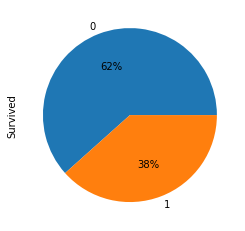

In [17]:
X1 = data.Survived
X1.value_counts().plot.pie(autopct='%1.0f%%');
plt.style.use("ggplot")
X1.value_counts()

> Sobrevivien 342 personas, el 38% de los pasajeros

### Supervivientes: Edad, Sexo y Clase

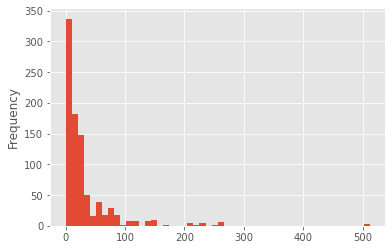

In [18]:
data["Fare"].plot(kind="hist",bins=50);

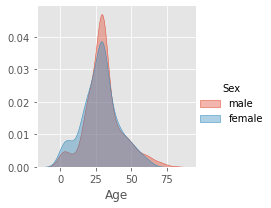

In [19]:
g = sns.FacetGrid(data,hue='Sex')
g = g.map(sns.kdeplot,'Age',shade=True,alpha=0.4)                      
g.add_legend();

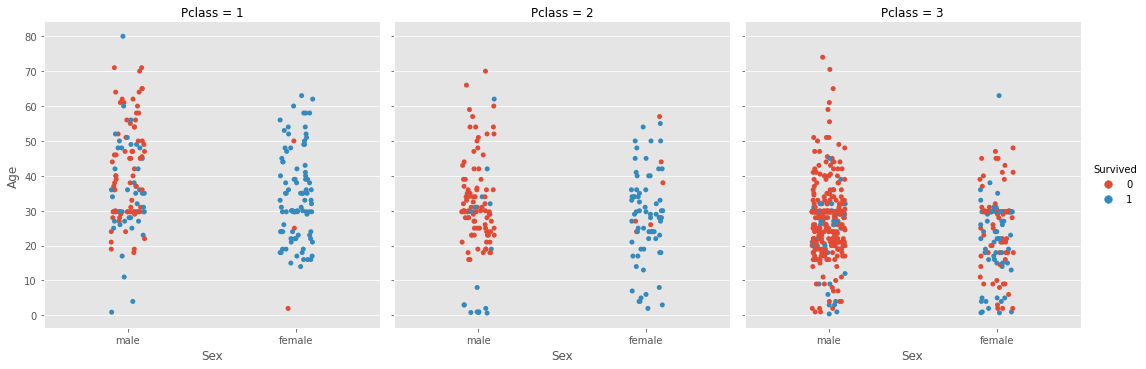

In [20]:
sns.catplot(data=data,x="Sex",y="Age",hue="Survived",col="Pclass");

> De aquí se pueden sacar muchas conclusiones:
- Sobreviven la mayoría de niños 
- Sobreviven más mujeres que hombres
- Mueren la mayoría de ancianos 
- La clase importa mucho 

In [21]:
data.Sex.value_counts()   

male      577
female    314
Name: Sex, dtype: int64

In [22]:
pd.crosstab(data.Survived, data.Sex,normalize=1)  

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


>  Habian 577 hombres y 314 mujeres en el barco

> Sobrevivien el 74,2% de las mujeres mientras que  solo el 18,8 % de los hombres

### Supervivientes y Clase / Fare

- ¿Sobrevivir está relacionado con el precio del billete?

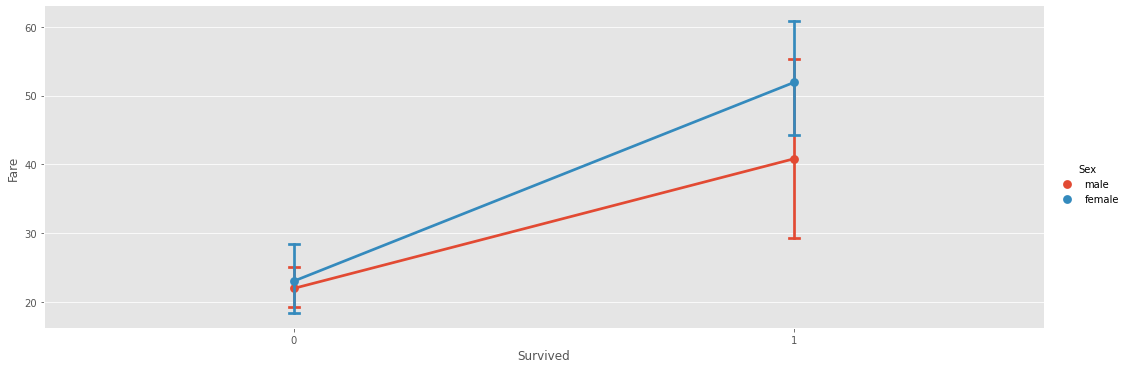

In [23]:
g = sns.catplot(data = data, kind = "point", x = "Survived", y = "Fare", hue="Sex", height=5,aspect=2.9, join=True,capsize=0.02)

> Conclusiones:
- La media del precio del billete de los supervivientes es muy superior a los no supervivientes
- La media del precio del billete de mujeres es superior al de hombres
- La importancia del precio del billete aumenta al ser mujer

- ¿Sobrevivir está relacionado con la clase? 

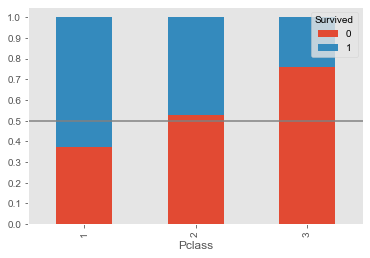

In [24]:
import numpy as np 
def graph_categorical(serie_1, serie_2):
    "Muestra un gráfico de barras stackeado con porcentajes"
    ct = pd.crosstab(serie_1,serie_2,normalize=0)
    ct.plot.bar(stacked=True)
    plt.yticks(np.arange(0,1.1,0.1))
    plt.axhline(y=0.5, color='grey', linestyle='-')
    plt.style.use("ggplot")
    sns.set_style("white")
    plt.grid()
    plt.show()
    
graph_categorical(data.Pclass,data.Survived)

> Claramente sí, a medida que se disminuye en la clase, aumenta la probabilidad de no Sobrevivir

### Correlaciones lineales

In [25]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


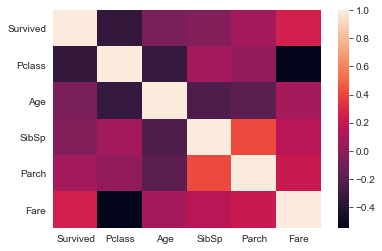

In [26]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.show()

In [27]:
def top_correlation (df,n):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlacion"]
    correlation = correlation.reindex(correlation.Correlacion.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)
    
top_correlation(data,10)


,Variable_1,Variable_2,Correlacion
0,Pclass,Fare,-0.549500
1,SibSp,Parch,0.414838
2,Survived,Pclass,-0.338481
3,Pclass,Age,-0.331339
4,Survived,Fare,0.257307
5,Age,SibSp,-0.232625
6,Parch,Fare,0.216225
7,Age,Parch,-0.179191
8,SibSp,Fare,0.159651
9,Age,Fare,0.091566


> Correlaciones lineales:
- Por supuesto la clase y el precio de billete estan correlacionados
- El numero de familiares a bordo (viajar en familia) también
- Relación negativa entre edad y clase; A mayor adultez mayor dinero

Datos curiosos: 
- Sobrevivien los jovenes antes que los adultos
- Sobreviven los que han pagado más

...sin embargo los adultos son los que más han pagado.

# 3 Pre-procesado de datos

### Seleccionar variables

> Se deben codificar las variables categóricas

## Categorical data

In [28]:
dict_sex = {"female":1,"male":0}

In [29]:
data["Sex"] = [dict_sex[x] for x in data["Sex"]]

In [30]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [31]:
X = data.drop("Survived",axis=1)
Y = data.Survived

columnas = X.columns

In [32]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


## Split Dataset

In [33]:
#Dividir en test/train.....................................................................................................
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# Model-Selection

## Logistic Regresion

In [34]:
#Regresión Logística
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

In [35]:
#Matriz de confusion
cm = pd.crosstab(Y_test, Y_pred,rownames=['Real'], colnames=["Predicción"],normalize=1)
cm

Predicción,0,1
Real,,
0,0.812865,0.185567
1,0.187135,0.814433


In [36]:
logreg.coef_[0]   # Pesos de cada variable 

array([-0.89671499,  2.50642293, -0.03459487, -0.2911056 , -0.11602206,
        0.00374703])

In [37]:
X_train.columns    # Orden variables 

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [38]:
#Pesos de cada variable en orden 
Variables = pd.DataFrame(X_train.columns)
Variables.columns = ['Variables']
Variables["Peso"]=logreg.coef_[0]
Variables = Variables.reindex(Variables.Peso.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
display(Variables.head(10))

,Variables,Peso
0,Sex,2.506423
1,Pclass,-0.896715
2,SibSp,-0.291106
3,Parch,-0.116022
4,Age,-0.034595
5,Fare,0.003747


In [39]:
#Pesos de cada variable en orden 
Variables = pd.DataFrame(X_train.columns)
Variables.columns = ['Variables']
Variables["Peso"]=logreg.coef_[0]
Variables = Variables.reindex(Variables.Peso.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
display(Variables.head(10))

,Variables,Peso
0,Sex,2.506423
1,Pclass,-0.896715
2,SibSp,-0.291106
3,Parch,-0.116022
4,Age,-0.034595
5,Fare,0.003747


### Decision Tree

In [40]:
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [41]:
#Matriz de confusion
cm = pd.crosstab(Y_test, Y_pred,rownames=['Real'], colnames=["Predicción"],normalize=1)
cm

Predicción,0,1
Real,,
0,0.77381,0.27
1,0.22619,0.73


# Hacer nuevas predicciones

> Dado que el modelo de regresión logistica es el que mejor datos obtuvo, es el que se usaría para futuras predicciones

> El modelo de LOGREG es muy sencillo, unicamente tendríamos que multiplicar los pesos correspondientes a las variables (codificadas) sumado al punto origen (B0) para realizar su predicción de supervivencia

> Recordar que: {"female":1,"male":0}

### Utilizando la funcion de scikit-learn

In [42]:
X_train.head(0)

,Pclass,Sex,Age,SibSp,Parch,Fare


In [43]:
new_prediction = [[2,0,25,0,0,50]] # Vector con predicciones en orden

In [44]:
logreg.predict(new_prediction)     # Valor absoluto de sobrevivir (0/1)

array([0], dtype=int64)

In [45]:
logreg.classes_     # Clases

array([0, 1], dtype=int64)

In [46]:
logreg.predict_proba(new_prediction)     # Probabilidad de sobrevivir por clase.

array([[0.6929611, 0.3070389]])

69,2% de morir, 30,7% de sobrevivir

### Utilizando manualmente los pesos

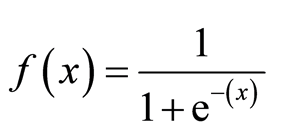

In [47]:
def new_predict(vector_variables):
    "['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']" # Orden de las variables 
    
    vector = np.array(vector_variables) 
    pesos = np.array([-0.89671499,  2.50642293, -0.03459487, -0.2911056 , -0.11602206, 0.00374703]) # logreg.coef_[0]
    intercept = 1.6569509913284493      # logreg.intercept_[0]
    
    
    p = (pesos*vector).sum()+intercept # Ecuación de la recta
    y = 1/(1 + np.exp(-p) )  # Predicción probabilidad, función sigmoide 

    return y       # Probabilidad de sobrevivir 

In [48]:
new_predict([2,0,25,0,0,50])

0.3070389375593404

In [49]:
logreg.predict_proba(new_prediction)[0][1]

0.3070389007825701

# Acknowledgements